In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

2022-05-24 17:40:57.770032: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-24 17:40:57.770060: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


((8982,), (8982,), (2246,), (2246,))

In [2]:
train_data[0:1]

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])],
      dtype=object)

In [3]:
import numpy as np
labels = np.unique(train_labels)
labels, len(labels)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 46)

In [4]:
def decode_words(word_index, sentence):
    reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    return " ".join(
        [reverse_word_index.get(i-3, "?") for i in sentence]
    )
decode_words(reuters.get_word_index(), train_data[0])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [5]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train.shape, x_test.shape

((8982, 10000), (2246, 10000))

In [6]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

In [7]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)
y_train.shape, y_test.shape

((8982, 46), (2246, 46))

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", 
              loss="categorical_crossentropy",
              metrics=["accuracy"])


2022-05-24 17:40:59.365162: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-24 17:40:59.365348: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-24 17:40:59.365375: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-05-24 17:40:59.365401: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-05-24 17:40:59.365424: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [9]:
n_val = 1000
x_val = x_train[:n_val]
partial_x_train = x_train[n_val:]
y_val = y_train[:n_val]
partial_y_train = y_train[n_val:]
x_val.shape, partial_x_train.shape, y_val.shape, partial_y_train.shape

((1000, 10000), (7982, 10000), (1000, 46), (7982, 46))

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 1s 16ms/step - loss: 2.6343 - accuracy: 0.5469 - val_loss: 1.7063 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: 1.3996 - accuracy: 0.7175 - val_loss: 1.2900 - val_accuracy: 0.7260
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: 1.0401 - accuracy: 0.7834 - val_loss: 1.1448 - val_accuracy: 0.7590
Epoch 4/20
16/16 [==============================] - 0s 9ms/step - loss: 0.8247 - accuracy: 0.8279 - val_loss: 1.0399 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 0s 7ms/step - loss: 0.6565 - accuracy: 0.8634 - val_loss: 0.9826 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 0s 7ms/step - loss: 0.5286 - accuracy: 0.8890 - val_loss: 0.9550 - val_accuracy: 0.8110
Epoch 7/20
16/16 [==============================] - 0s 7ms/step - loss: 0.4276 - accuracy: 0.9095 - val_loss: 0.9242 - val_accuracy: 0.8140
Epoch 8/20
16/16 [=

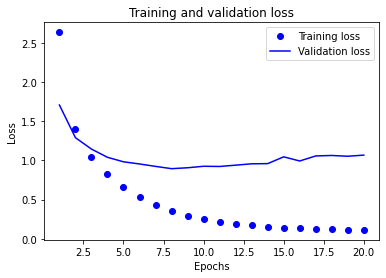

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

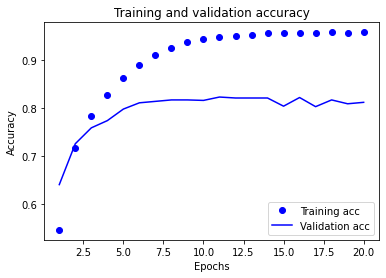

In [12]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["accuracy"]
val_loss_values = history_dict["val_accuracy"]
epochs = range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training acc")
plt.plot(epochs, val_loss_values, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", 
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                   epochs=9,
                   batch_size=512,
                   validation_data=(x_val,y_val))
results = model.evaluate(x_test, y_test)
results

Epoch 1/9
16/16 [==============================] - 1s 13ms/step - loss: 2.5977 - accuracy: 0.5234 - val_loss: 1.7129 - val_accuracy: 0.6510
Epoch 2/9
16/16 [==============================] - 0s 7ms/step - loss: 1.4050 - accuracy: 0.7114 - val_loss: 1.3087 - val_accuracy: 0.7100
Epoch 3/9
16/16 [==============================] - 0s 7ms/step - loss: 1.0584 - accuracy: 0.7730 - val_loss: 1.1707 - val_accuracy: 0.7380
Epoch 4/9
16/16 [==============================] - 0s 7ms/step - loss: 0.8386 - accuracy: 0.8217 - val_loss: 1.0209 - val_accuracy: 0.7870
Epoch 5/9
16/16 [==============================] - 0s 7ms/step - loss: 0.6671 - accuracy: 0.8584 - val_loss: 0.9529 - val_accuracy: 0.8070
Epoch 6/9
16/16 [==============================] - 0s 7ms/step - loss: 0.5270 - accuracy: 0.8909 - val_loss: 0.9317 - val_accuracy: 0.7950
Epoch 7/9
16/16 [==============================] - 0s 7ms/step - loss: 0.4224 - accuracy: 0.9127 - val_loss: 0.8858 - val_accuracy: 0.8140
Epoch 8/9
16/16 [=========

[0.9989012479782104, 0.7889581322669983]

In [14]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1803205699020481

In [15]:
y_pred = model.predict(x_test)
np.argmax(y_pred[0])

71/71 [==============================] - 0s 570us/step


3

In [16]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop", 
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                   epochs=9,
                   batch_size=128,
                   validation_data=(x_val,y_val))
results = model.evaluate(x_test, y_test)
results

Epoch 1/9
63/63 [==============================] - 1s 5ms/step - loss: 3.1930 - accuracy: 0.3271 - val_loss: 2.8792 - val_accuracy: 0.5540
Epoch 2/9
63/63 [==============================] - 0s 3ms/step - loss: 2.6290 - accuracy: 0.5215 - val_loss: 2.5564 - val_accuracy: 0.3710
Epoch 3/9
63/63 [==============================] - 0s 3ms/step - loss: 2.2726 - accuracy: 0.3854 - val_loss: 2.2523 - val_accuracy: 0.3690
Epoch 4/9
63/63 [==============================] - 0s 3ms/step - loss: 1.7459 - accuracy: 0.4614 - val_loss: 1.5642 - val_accuracy: 0.6970
Epoch 5/9
63/63 [==============================] - 0s 3ms/step - loss: 1.1059 - accuracy: 0.7355 - val_loss: 1.2633 - val_accuracy: 0.6980
Epoch 6/9
63/63 [==============================] - 0s 3ms/step - loss: 0.9313 - accuracy: 0.7565 - val_loss: 1.2300 - val_accuracy: 0.7110
Epoch 7/9
63/63 [==============================] - 0s 3ms/step - loss: 0.8408 - accuracy: 0.7851 - val_loss: 1.2144 - val_accuracy: 0.7220
Epoch 8/9
63/63 [==========

[1.3893059492111206, 0.700801432132721]